In [1]:

import numpy as np
# import pandas as pd


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [5]:
imu_data = pd.read_csv("../imu_data_4hrs.csv")

In [6]:
imu_data.shape

(2217621, 12)

In [7]:
imu_data.head()

system_time  razor_time  acc_x  acc_y  acc_z  gyro_x  gyro_y  gyro_z  \
0  427895.953112      -34.81  30.76   9.30  33.41     NaN     NaN     NaN   
1  427895.959836   376257.00   0.04   0.01  -1.03   -1.65    1.04   -0.55   
2  427895.966356   376263.00   0.03   0.01  -1.06   -1.65    0.67   -0.67   
3  427895.972825   376270.00   0.02   0.01  -1.06   -1.65    0.43   -0.61   
4  427895.979404   376277.00   0.03   0.02  -1.06   -1.59    0.43   -0.55   

   mag_x  mag_y  mag_z   temp  
0    NaN    NaN    NaN    NaN  
1 -34.81  30.76   9.30  33.41  
2 -34.81  30.76   9.30  33.43  
3 -34.66  31.66  12.45  33.42  
4 -34.66  31.66  12.45  33.43

In [7]:
imu_data = imu_data[1:]

In [8]:
%matplotlib notebook

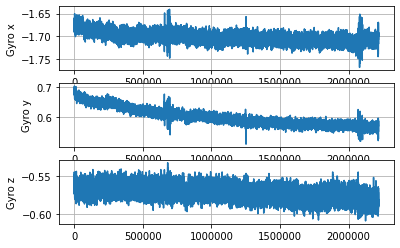

In [9]:
fig, axes = plt.subplots(3, 1)
axes[0].grid()
axes[0].plot(imu_data.gyro_x.rolling(150).mean())
axes[0].set_ylabel('Gyro x')

axes[1].grid()
axes[1].plot(imu_data.gyro_y.rolling(150).mean())
axes[1].set_ylabel('Gyro y')

axes[2].grid()
axes[2].plot(imu_data.gyro_z.rolling(150).mean())
axes[2].set_ylabel('Gyro z')

plt.show()

In [15]:
%matplotlib notebook
fig, axes = plt.subplots(3, 1)
axes[0].grid()
axes[0].plot(imu_data.acc_x.rolling(150).mean())
axes[0].set_ylabel('Acc x')

axes[1].grid()
axes[1].plot(imu_data.acc_y.rolling(150).mean())
axes[1].set_ylabel('Acc y')

axes[2].grid()
axes[2].plot(imu_data.acc_z.rolling(150).mean())
axes[2].set_ylabel('Acc z')

plt.show()

<IPython.core.display.Javascript object>

In [11]:
fig, axes = plt.subplots(3, 1)
axes[0].grid()
axes[0].plot(imu_data.mag_x.rolling(150).mean())
axes[0].set_ylabel('Mag x')

axes[1].grid()
axes[1].plot(imu_data.mag_y.rolling(150).mean())
axes[1].set_ylabel('Mag y')

axes[2].grid()
axes[2].plot(imu_data.mag_z.rolling(150).mean())
axes[2].set_ylabel('Mag z')

plt.show()

In [16]:
np.linalg.norm([34.5, 31.5, 11.5])

48.111848852439664

In [12]:
#Allen variance

def average_frequency(data, n):
   
    databis = data[len(data)%n:]
    return databis.reshape(len(data)//n, n).mean(axis=1)

def AllanVariance(data, n):
    
    y = average_frequency(data, n)
    return  ((y[1:] - y[:-1])**2).mean() /2

In [13]:
def n(a):
    return np.array(a)

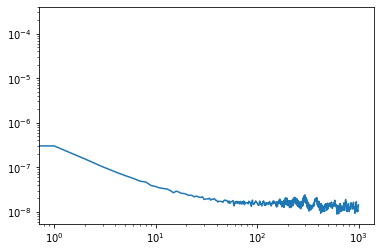

In [14]:
plt.figure()
plt.loglog([AllanVariance(n(imu_data.acc_x),i) for i in range(1,100000, 100)])
plt.show()

In [30]:
acc = n([0.036, 0.008, -1.045])
acc_norm = acc/acc[2]
print(acc_norm)

[-0.03444976 -0.0076555   1.        ]


In [65]:
def lp_filter(arr, alpha = 0.05):
    fil_arr = [arr[0]]
    for a in arr[1:]:
        fil_arr.append(alpha*a+(1-alpha)*fil_arr[-1])
    return fil_arr

In [82]:
data = pd.read_csv("~/Downloads/imu_data_ramp.csv")
data = data[1:]
fig, axes = plt.subplots(3, 1)
axes[0].plot(lp_filter(n(data.acc_x)))
axes[1].plot(lp_filter(n(data.acc_y)))
axes[2].plot(lp_filter(n(data.acc_z)))
axes[0].grid()
axes[1].grid()
axes[2].grid()
plt.show()

<IPython.core.display.Javascript object>

In [83]:
np.linalg.norm([0.85,0.03,0.48])

0.9766268478799873

In [70]:
data = pd.read_csv("~/Downloads/imu_data.csv")
data = data[1:]
fig, axes = plt.subplots(2, 1)
axes[0].plot(lp_filter(n(data.acc_x)))
axes[1].plot(lp_filter(n(data.acc_y)))
axes[0].grid()
axes[1].grid()
plt.show()

system_time  razor_time  acc_x  acc_y  acc_z  gyro_x  gyro_y  gyro_z  \
1       0.140297   2058599.0   0.03   0.07   0.97   -5.61    2.26    0.79   
2       0.148287   2058607.0   0.02   0.08   0.96   -3.41    1.10    0.49   
3       0.154784   2058614.0   0.02   0.07   0.95   -2.44    0.79    0.37   
4       0.163326   2058622.0   0.02   0.08   0.96   -2.26    0.49    0.18   
5       0.170312   2058629.0   0.02   0.08   0.95   -1.95    0.37   -0.06   
6       0.178006   2058637.0   0.01   0.07   0.94   -1.89   -0.06    0.12   
7       0.184702   2058644.0   0.02   0.07   0.95   -2.13    0.00    0.12   
8       0.193017   2058652.0   0.02   0.07   0.95   -2.38    0.43    0.24   
9       0.199964   2058659.0   0.03   0.07   0.94   -2.74    0.49    0.24   
10      0.208511   2058667.0   0.03   0.07   0.98   -3.17    0.85    0.24   
11      0.215124   2058674.0   0.03   0.06   0.98   -2.80    0.67    0.24   
12      0.223472   2058682.0   0.03   0.07   0.97   -0.67   -0.30   -0.06   
13      0.229681   2058688.0   0.03   0.07   0.96   -0.55   -0.49   -0.06   
14      0.238201   2058697.0   0.02   0.07   0.96   -0.91    0.00   -0.30   
15      0.244711   2058703.0   0.03   0.06   0.95   -1.16    0.37   -0.37   
16      0.251320   2058710.0   0.03   0.07   0.94   -1.22    0.67   -0.37   
17      0.258161   2058717.0   0.02   0.06   0.95   -1.95    1.28   -0.49   
18      0.265064   2058723.0   0.02   0.07   0.96   -2.32    1.71   -0.49   
19      0.273496   2058732.0   0.02   0.08   0.98   -2.68    1.77   -0.61   
20      0.279711   2058738.0   0.02   0.08   0.98   -2.62    1.65   -0.49   
21      0.288162   2058747.0   0.01   0.08   0.97   -2.26    1.04   -0.24   
22      0.295034   2058753.0   0.03   0.08   0.96   -2.07    0.55   -0.18   
23      0.303238   2058762.0   0.03   0.06   0.96   -1.95   -0.12    0.06   
24      0.310041   2058768.0   0.02   0.06   0.97   -1.77   -0.12    0.06   
25      0.318201   2058777.0   0.02   0.07   0.96   -2.13    0.00    0.12   
26      0.324714   2058783.0   0.01   0.06   0.95   -2.50    0.24    0.12   
27      0.331240   2058790.0   0.02   0.06   0.95   -3.05    0.43    0.12   
28      0.338209   2058797.0   0.03   0.06   0.94   -3.54    0.91    0.00   
29      0.344574   2058803.0   0.03   0.06   0.94   -3.41    1.10   -0.06   
30      0.353070   2058812.0   0.02   0.06   0.96   -3.23    1.16   -0.12   
..           ...         ...    ...    ...    ...     ...     ...     ...   
471     3.568543   2062027.0   0.01   0.01   0.96    0.24   -2.50    0.91   
472     3.575199   2062034.0   0.01  -0.01   0.95   -0.06   -2.87    0.49   
473     3.582201   2062041.0   0.00  -0.01   0.96   -0.61   -2.56    0.67   
474     3.588781   2062047.0   0.01  -0.01   0.94   -2.20   -1.83    0.37   
475     3.595053   2062054.0   0.01   0.01   0.96   -2.62   -1.65    0.00   
476     3.604516   2062063.0   0.01   0.00   0.95   -3.17   -2.56   -0.85   
477     3.610489   2062069.0   0.01  -0.00   0.96   -2.93   -3.23   -0.79   
478     3.618513   2062077.0   0.01   0.02   0.95   -3.41   -3.05   -0.67   
479     3.625477   2062084.0   0.01   0.01   0.95   -3.41   -3.11   -1.04   
480     3.633587   2062092.0   0.01   0.02   0.95   -2.80   -2.07   -1.22   
481     3.640284   2062099.0  -0.00   0.02   0.96   -2.93   -2.20   -1.10   
482     3.646932   2062106.0   0.00   0.02   0.95   -2.68   -1.95   -1.22   
483     3.653410   2062112.0   0.01   0.01   0.94   -2.38   -1.28   -1.16   
484     3.660147   2062119.0   0.03   0.01   0.96   -2.32   -1.04   -1.28   
485     3.668543   2062127.0   0.00   0.01   0.94   -2.38   -1.10   -1.59   
486     3.675026   2062134.0   0.01  -0.00   0.94   -2.74   -0.67   -1.40   
487     3.683379   2062142.0   0.01   0.00   0.93   -3.17    0.85   -1.04   
488     3.690560   2062149.0   0.03   0.00   0.94   -3.17    2.01   -1.10   
489     3.698667   2062157.0   0.00   0.01   0.92   -2.62    3.96   -0.49   
490     3.705303   2062164.0   0.01   0.02   0.93   -1.59    5.37   -0.06   
4